 # Example: Bikeshare data

In [1]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras import backend as K

In [2]:
df = pd.read_csv('G:/JJSD/bike.csv')  # Bikeshare data from ISLR2 R package

In [3]:
df.head()

,Unnamed: 0,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.shape

(8645, 16)

In [5]:
df.describe()

,Unnamed: 0,season,day,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,bikers
count,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000,8645.00000,8645.000000,8645.000000,8645.000000,8645.000000,8645.000000
mean,4323.000000,2.513592,184.39572,11.573626,0.027646,3.012724,0.683748,0.489069,0.46900,0.643430,0.191172,28.600578,115.193869,143.794448
std,2495.740872,1.105477,104.82334,6.907822,0.163966,2.006370,0.465040,0.197943,0.17676,0.196293,0.123191,38.840789,109.461014,133.797854
min,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.020000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2162.000000,2.000000,94.00000,6.000000,0.000000,1.000000,0.000000,0.320000,0.31820,0.490000,0.104500,3.000000,26.000000,31.000000
50%,4323.000000,3.000000,185.00000,12.000000,0.000000,3.000000,1.000000,0.500000,0.48480,0.650000,0.194000,14.000000,90.000000,109.000000
75%,6484.000000,3.000000,275.00000,18.000000,0.000000,5.000000,1.000000,0.660000,0.62120,0.810000,0.283600,38.000000,168.000000,211.000000
max,8645.000000,4.000000,365.00000,23.000000,1.000000,6.000000,1.000000,0.960000,1.00000,1.000000,0.850700,272.000000,567.000000,651.000000


In [6]:
dff = pd.get_dummies(df, columns=['mnth', 'hr', 'weathersit'], drop_first=True)

In [7]:
dff.head()

,Unnamed: 0,season,day,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weathersit_cloudy/misty,weathersit_heavy rain/snow,weathersit_light rain/snow
0,1,1,1,0,6,0,0.24,0.2879,0.81,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,6,0,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,6,0,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,6,0,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,6,0,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dff.shape

(8645, 50)

In [9]:
dff.columns

Index(['Unnamed: 0', 'season', 'day', 'holiday', 'weekday', 'workingday',
       'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'bikers',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7',
       'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15',
       'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23',
       'weathersit_cloudy/misty', 'weathersit_heavy rain/snow',
       'weathersit_light rain/snow'],
      dtype='object')

In [10]:
x_data = dff.loc[:,['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
        'mnth_July', 'mnth_June', 'mnth_March', 'mnth_May', 'mnth_Nov',
        'mnth_Oct', 'mnth_Sept', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5',
        'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13',
        'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21',
        'hr_22', 'hr_23', 'weathersit_cloudy/misty',
        'weathersit_heavy rain/snow', 'weathersit_light rain/snow','workingday', 'temp', 'atemp', 'hum', 'windspeed']] 

In [11]:
x_data.head()

,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,mnth_May,mnth_Nov,mnth_Oct,...,hr_22,hr_23,weathersit_cloudy/misty,weathersit_heavy rain/snow,weathersit_light rain/snow,workingday,temp,atemp,hum,windspeed
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.24,0.2879,0.81,0.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.22,0.2727,0.80,0.0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.22,0.2727,0.80,0.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.24,0.2879,0.75,0.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.24,0.2879,0.75,0.0


In [12]:
x_data.shape
#x_data.shape[1]

(8645, 42)

In [13]:
y_data=dff.loc[:,['bikers']]  #output vatiable

In [14]:
from math import *
import random
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM   #GLM
from statsmodels.genmod.families import Poisson
from statsmodels.genmod.families import Gaussian

In [15]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)

In [16]:
rep = 3 # No. of Replications

mse, mse_0, mse_n, mse_p = [],[],[],[]
mae, mae_0, mae_n, mae_p = [],[],[],[]
for i in range(rep):
    seed_everything(i+500) # fixed seed 
    # Data splitting
    x_tr, x_te,  y_tr, y_te = train_test_split(x_data, y_data, test_size=0.2, random_state = i+600) 
    tf.keras.backend.clear_session()
    
    #### M4: Poi-DNN
    # Model setting
    input_X = Input(shape=(x_tr.shape[1],))                  # Input layer
    layer_1 = Dense(10, activation='relu')(input_X)         # 1st hidden layer
    layer_2 = Dense(5, activation='relu')(layer_1)           # 2nd hidden layer
    y_pred = Dense(1, activation='exponential')(layer_2)  # Output layer
    # Model compile and fitting
    model = Model(inputs=[input_X], outputs=[y_pred])
    model.compile(loss='poisson', optimizer=Adam(learning_rate=0.002)) 
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta = 0.002)   
    reducelr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.95, verbose = 0, min_lr = 0)
    history = model.fit(x_tr, y_tr, epochs=2000, batch_size=32, 
                        verbose=0,  validation_split= .25, callbacks=[earlystop,reducelr])  
    # Model prediction and evaluation(MSE and MAE)
    y_hat_te = model.predict(x_te)  
    mse.append(np.mean(np.square(y_te - y_hat_te))) 
    mae.append(np.mean(np.abs(y_te - y_hat_te)))   
    
    #### M3: DNN
    input_X = Input(shape=(x_tr.shape[1],))    
    layer_1 = Dense(10, activation='relu')(input_X)
    layer_2 = Dense(5, activation='relu')(layer_1)
    y_pred0 = Dense(1, activation='linear')(layer_2)
    model0 = Model(inputs=[input_X], outputs=[y_pred0])    
    model0.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.002))         
    earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta = 0.002)
    reducelr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.95, verbose = 1, min_lr = 0)
    history = model0.fit(x_tr, y_tr, epochs=2000, batch_size=32, 
                             verbose=0,  validation_split= .25, callbacks=[earlystop,reducelr])     
    y_hat_te0 = model0.predict(x_te)
    mse_0.append(np.mean(np.square(y_te - y_hat_te0))) 
    mae_0.append(np.mean(np.abs(y_te - y_hat_te0))) 
    
    #### M2: Poi-GLM
    x1_tr = sm.add_constant(x_tr)
    x1_te = sm.add_constant(x_te)
    model_p = sm.GLM(y_tr, x1_tr, family=sm.families.Poisson())
    results = model_p.fit()
    y_hat_p = results.predict(x1_te)     
    mse_p.append(np.mean(np.square(y_te.values.ravel() - y_hat_p.values.ravel())))
    mae_p.append(np.mean(np.abs(y_te.values.ravel() - y_hat_p.values.ravel())))  
    
    #### M1: LM (Normal-GLM)
    model_n = sm.GLM(y_tr, x1_tr, family=sm.families.Gaussian())
    results_n = model_n.fit()
    y_hat_n = results_n.predict(x1_te)
    mse_n.append(np.mean(np.square(y_te.values.ravel() - y_hat_n.values.ravel())))
    mae_n.append(np.mean(np.abs(y_te.values.ravel() - y_hat_n.values.ravel())))
    


Epoch 254: ReduceLROnPlateau reducing learning rate to 0.0019000000902451575.

Epoch 292: ReduceLROnPlateau reducing learning rate to 0.0018050000304356217.

Epoch 317: ReduceLROnPlateau reducing learning rate to 0.0017147500067949293.

Epoch 381: ReduceLROnPlateau reducing learning rate to 0.0016290124622173607.

Epoch 395: ReduceLROnPlateau reducing learning rate to 0.0015475617838092148.

Epoch 408: ReduceLROnPlateau reducing learning rate to 0.001470183639321476.

Epoch 418: ReduceLROnPlateau reducing learning rate to 0.0013966744241770356.

Epoch 160: ReduceLROnPlateau reducing learning rate to 0.0019000000902451575.

Epoch 186: ReduceLROnPlateau reducing learning rate to 0.0018050000304356217.

Epoch 216: ReduceLROnPlateau reducing learning rate to 0.0017147500067949293.

Epoch 227: ReduceLROnPlateau reducing learning rate to 0.0016290124622173607.

Epoch 242: ReduceLROnPlateau reducing learning rate to 0.0015475617838092148.

Epoch 252: ReduceLROnPlateau reducing learning rate 

In [17]:
import matplotlib.pyplot as plt

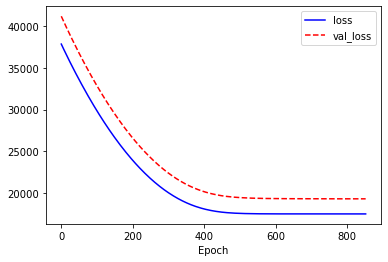

In [18]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# Check of prediction results at each replication
print(np.sqrt(mse)) #RMSE in Poi-DNN
print(np.sqrt(mse_0)) #RMSE in DNN
print(np.sqrt(mse_p))#RMSE in Poi-GLM
print(np.sqrt(mse_n)) #RMSE in LM

[[39.80083284]
 [44.29924272]
 [43.29475983]]
[[ 41.56384774]
 [ 41.89622156]
 [133.42714139]]
[71.27004592 68.34072309 70.06194448]
[78.16341894 75.1454173  75.70639897]


In [20]:
 # Prediction results: summary

In [21]:
#RMSE(mean)
print(np.mean(np.sqrt(mse)))
print(np.mean(np.sqrt(mse_0)))
print(np.mean(np.sqrt(mse_n)))
print(np.mean(np.sqrt(mse_p)))
# RMSE(median)
print(np.median(np.sqrt(mse)))
print(np.median(np.sqrt(mse_0)))
print(np.median(np.sqrt(mse_n)))
print(np.median(np.sqrt(mse_p)))
# RMSE (SD)
print(np.std(np.sqrt(mse)))
print(np.std(np.sqrt(mse_0)))
print(np.std(np.sqrt(mse_n)))
print(np.std(np.sqrt(mse_p)))

42.46494512831408
72.29573689656866
76.33841173306904
69.89090449642408
43.294759831677496
41.896221560776524
75.7063989664135
70.06194448236153
1.9279293198404046
43.22664363018612
1.3106394321513468
1.201991146310758


In [22]:
#MAE (mean)
print(np.mean(mae))
print(np.mean(mae_0))
print(np.mean(mae_n))
print(np.mean(mae_p))
#MAE (median)
print(np.median(mae))
print(np.median(mae_0))
print(np.median(mae_n))
print(np.median(mae_p))
#MAE (SD)
print(np.std(mae))
print(np.std(mae_0))
print(np.std(mae_n))
print(np.std(mae_p))

26.437443105476266
53.300872097407
57.154070174056336
47.27696846900046
26.453226806801684
27.170126402840026
56.544907747185974
47.26643866256433
0.9275558430097647
37.55461445871562
1.0907485054938373
0.7800543167720482


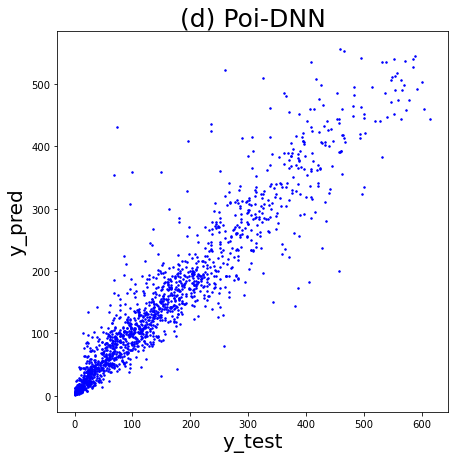

In [23]:
m1=np.min(y_te)
m2=np.max(y_te)
m3=np.min(y_hat_te)
m4=np.max(y_hat_te)
plt.figure(figsize=(7,7))
plt.plot(y_te,y_hat_te, 'b.', markersize=3)
plt.title('(d) Poi-DNN', fontsize=25)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('y_pred',fontsize=20)
plt.show()
#plt.savefig('G:/JJSD/bike_plot_3d.pdf')

In [24]:
cha = pd.DataFrame(y_hat_te0)
cha.describe()

,0
count,1729.000000
mean,142.969009
std,0.001481
min,142.970490
25%,142.970490
50%,142.970490
75%,142.970490
max,142.970490


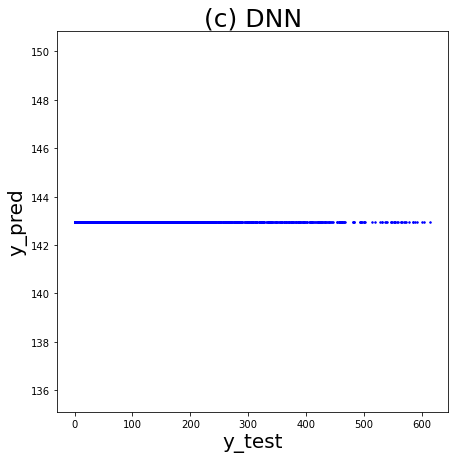

In [25]:
m1=np.min(y_te)
m2=np.max(y_te)
m3=np.min(y_hat_te0)
m4=np.max(y_hat_te0)
plt.figure(figsize=(7,7))
plt.plot(y_te,y_hat_te0, 'b.', markersize=3)
plt.title('(c) DNN', fontsize=25)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('y_pred',fontsize=20)
plt.show()
#plt.savefig('G:/JJSD/bike_plot_3c.pdf')

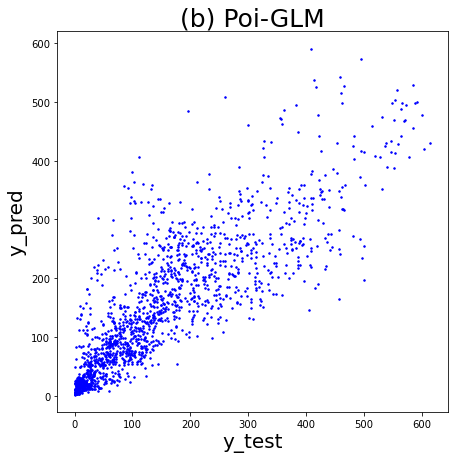

In [26]:
m1=np.min(y_te)
m2=np.max(y_te)
m3=np.min(y_hat_p)
m4=np.max(y_hat_p)
plt.figure(figsize=(7,7))
plt.plot(y_te,y_hat_p, 'b.', markersize=3)
plt.title('(b) Poi-GLM', fontsize=25)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('y_pred',fontsize=20)
plt.show()
#plt.savefig('G:/JJSD/bike_plot_3b.pdf')

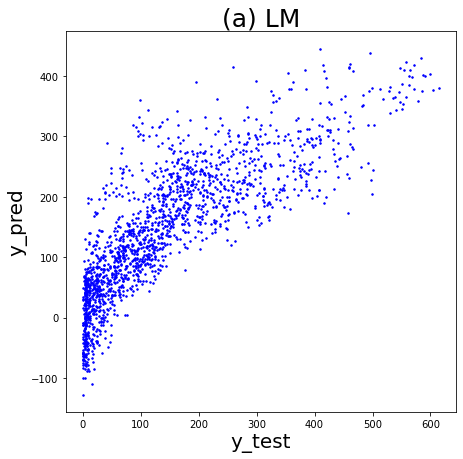

In [27]:
m1=np.min(y_te)
m2=np.max(y_te)
m3=np.min(y_hat_n)
m4=np.max(y_hat_n)
plt.figure(figsize=(7,7))
plt.plot(y_te,y_hat_n, 'b.', markersize=3)
plt.title('(a) LM', fontsize=25)
plt.xlabel('y_test',fontsize=20)
plt.ylabel('y_pred',fontsize=20)
plt.show()
#plt.savefig('G:/JJSD/bike_plot_3a.pdf')

In [28]:
RMSE_rep = np.column_stack([np.sqrt(mse_n), np.sqrt(mse_p), np.sqrt(mse_0), np.sqrt(mse)])
df_rmse = pd.DataFrame(RMSE_rep, columns=['a0','a1','a2', 'a3'])

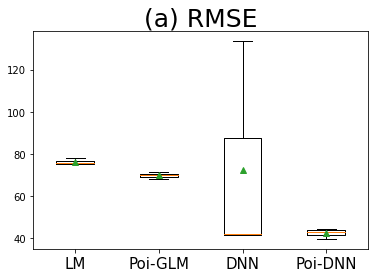

In [29]:
fig, ax = plt.subplots()
ax.boxplot([df_rmse['a0'], df_rmse['a1'], df_rmse['a2'],  df_rmse['a3']], sym="b*", showmeans=True)
plt.title('(a) RMSE',fontsize=25)
plt.xticks([1, 2,3, 4], ['LM','Poi-GLM', 'DNN', 'Poi-DNN'], fontsize=15)
plt.show()

In [30]:
MAE_rep = np.column_stack([mae_n, mae_p, mae_0, mae])
df_mae = pd.DataFrame(MAE_rep, columns=['b0','b1','b2', 'b3'])

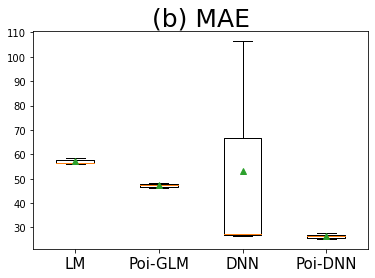

In [31]:
fig, ax = plt.subplots()
ax.boxplot([df_mae['b0'], df_mae['b1'], df_mae['b2'],  df_mae['b3']], sym="b*", showmeans=True)
plt.title('(b) MAE',fontsize=25)
plt.xticks([1, 2,3, 4], ['LM','Poi-GLM', 'DNN', 'Poi-DNN'], fontsize=15)
plt.show()